In [ ]:
import io
from google.colab import files
uploaded1 = files.upload() # Upload HappinessReport.csv from local drive
uploaded2 = files.upload() # Upload numOfInternetUsers.csv from local drive

Saving HappinessCantrilLadder2005-2020.csv to HappinessCantrilLadder2005-2020 (2).csv


Saving numOfInternetUsers.csv to numOfInternetUsers (2).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Setup: Import the Datasets
Dataset on Happiness Index: Attached file <mark>"HappinessReport.csv"</mark><br/>
Dataset on Internet Users: Attached file <mark>"InternetUsers.csv"</mark>.

In [ ]:
happiness_index_df = pd.read_csv(io.BytesIO(uploaded1['HappinessCantrilLadder2005-2020.csv']))
happiness_index_df.rename(columns = {'Life satisfaction in Cantril Ladder (World Happiness Report 2021)' : 'Ladder Score'}, inplace = True)
happiness_index_df.head()


,Entity,Code,Year,Ladder Score
0,Afghanistan,AFG,2008,3.724
1,Afghanistan,AFG,2009,4.402
2,Afghanistan,AFG,2010,4.758
3,Afghanistan,AFG,2011,3.832
4,Afghanistan,AFG,2012,3.783


In [ ]:
happiness_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entity        1949 non-null   object 
 1   Code          1945 non-null   object 
 2   Year          1949 non-null   int64  
 3   Ladder Score  1949 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 61.0+ KB


In [ ]:
internet_df = pd.read_csv(io.BytesIO(uploaded2['numOfInternetUsers.csv']))
internet_df = internet_df.drop(["Indicator Name", "Indicator Code"], axis=1)
internet_df.rename(columns = {'Country Code' : 'Code'}, inplace = True)
internet_df = internet_df.melt(["Country Name", "Code"])
internet_df.rename(columns = {'variable' : 'Year', 'value' : 'Internet Users Percentage'}, inplace = True)
internet_df['Year']=internet_df['Year'].astype(int)

internet_df.head()

,Country Name,Code,Year,Internet Users Percentage
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,NaN


In [ ]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16226 entries, 0 to 16225
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country Name               16226 non-null  object 
 1   Code                       16226 non-null  object 
 2   Year                       16226 non-null  int64  
 3   Internet Users Percentage  7436 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 507.2+ KB


# Exploratory Data Analysis
Create a new empty dataframe with columns <mark>"Country", "Ladder Score", "Internet Users Percentage".</mark><br/>

In [ ]:
# OLD CODE:
# concat_df = pd.DataFrame(columns = ["Country", "Ladder Score", "InternetUsersPercentage"])
# # df.rename(columns = {'HappinessIndex' : 'Ladder Score'}, inplace = True)
# # df.rename(columns = {'Life satisfaction in Cantril Ladder (World Happiness Report 2021)' : 'Ladder Score'}, inplace = True)

# concat_df.info()

Append the relevant columns from the 2 imported datasets into the new dataframe on the condition that the country is present in both datasets.<br/>

In [ ]:
# counter = 0
# for index, row in happiness_index_df.iterrows():
#     if row["Country name"] in internet_df["Country Name"].values:
#         concat_df.loc[counter] = [row["Country name"], row["Ladder score"], internet_df.loc[internet_df["Country Name"] == row["Country name"]].squeeze()["Internet users percentage"]]
#         counter = counter + 1
# concat_df.head()

# internet_df['Year'].astype('int64').dtypes
# internet_df.info()



In [ ]:
concat_df = pd.merge(happiness_index_df, internet_df, on=["Year", 'Code'], how='left')
concat_df = concat_df.drop(["Entity", "Code", "Year", "Country Name"], axis=1)
concat_df.dropna(inplace= True)
concat_df.reset_index(drop = True, inplace=True)
concat_df


,Ladder Score,Internet Users Percentage
0,3.724,1.840000
1,4.402,3.550000
2,4.758,4.000000
3,3.832,5.000000
4,3.783,5.454545
...,...,...
1763,3.703,22.742818
1764,3.735,23.119989
1765,3.638,24.400000
1766,3.616,25.000000


Convert the Internet Users Percentage column from string to float by removing the '%" and typecasting the values to float

In [ ]:
# concat_df.head
# concat_df['InternetUsersPercentage'] = concat_df['InternetUsersPercentage'].map(lambda x: x.strip("%"))
# concat_df["InternetUsersPercentage"] = concat_df["InternetUsersPercentage"].astype(float)
#concat_df.head()

In [ ]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ladder Score               1768 non-null   float64
 1   Internet Users Percentage  1768 non-null   float64
dtypes: float64(2)
memory usage: 27.8 KB


<mark>Anomaly Detection</mark> Using <mark>Isolation Forest</mark>

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing
# Estimation of the anomaly population of the dataset (necessary for IsolationForest)
contamination = 0.01
# Copy concat_df into a temporary dataframe
df = concat_df.copy()
# Remove the country column in order to use IsolationForest
# del df["Country"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ladder Score               1768 non-null   float64
 1   Internet Users Percentage  1768 non-null   float64
dtypes: float64(2)
memory usage: 27.8 KB


In [ ]:
# Model Training
model = IsolationForest(contamination = contamination)
model.fit(df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.01)

In [ ]:
# Prediction
df["Anomalies_scores"] = model.decision_function(df[["Ladder Score", "Internet Users Percentage"]])
df["Anomaly"] = model.predict(df[["Ladder Score", "Internet Users Percentage"]])
df.head(1000)

,Ladder Score,Internet Users Percentage,Anomalies_scores,Anomaly
0,3.724,1.840000,0.100213,1
1,4.402,3.550000,0.146525,1
2,4.758,4.000000,0.135339,1
3,3.832,5.000000,0.130502,1
4,3.783,5.454545,0.125219,1
...,...,...,...,...
995,4.582,10.330000,0.170355,1
996,4.016,11.112186,0.128829,1
997,4.742,15.600000,0.158005,1
998,4.416,23.000000,0.130422,1


In [ ]:
concat_df["Anomaly"] = df["Anomaly"]
concat_df.head(2000)

,Ladder Score,Internet Users Percentage,Anomaly
0,3.724,1.840000,1
1,4.402,3.550000,1
2,4.758,4.000000,1
3,3.832,5.000000,1
4,3.783,5.454545,1
...,...,...,...
1763,3.703,22.742818,1
1764,3.735,23.119989,1
1765,3.638,24.400000,1
1766,3.616,25.000000,1


In [ ]:
# Removing the Anomalies
concat_df = concat_df[concat_df.Anomaly == 1]
concat_df.reset_index(inplace=True)
#concat_df.head()
del concat_df["Anomaly"]
#concat_df.head()
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1750 non-null   int64  
 1   Ladder Score               1750 non-null   float64
 2   Internet Users Percentage  1750 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 41.1 KB


Find rows that are <mark>outliers</mark> for <mark>"Ladder Score"</mark> and <mark>"Internet Users Percentage"</mark> and remove them.

In [ ]:
HappinessIndex_q3, HappinessIndex_q1 = np.percentile(concat_df["Ladder Score"], [75, 25])
InternetUsersPercentage_q3, InternetUsersPercentage_q1 = np.percentile(concat_df["Internet Users Percentage"], [75, 25])
HappinessIndex_iqr = HappinessIndex_q3 - HappinessIndex_q1
InternetUsersPercentage_iqr = InternetUsersPercentage_q3 - InternetUsersPercentage_q1
deleteRow = False
index_to_remove = []
for index, row in concat_df.iterrows():
    deleteRow = False
    if (row["Ladder Score"] <= HappinessIndex_q1 - 1.5*HappinessIndex_iqr) or (row["Ladder Score"] >= HappinessIndex_q3 + 1.5*HappinessIndex_iqr):
        deleteRow = True
    if (row["Internet Users Percentage"] <= InternetUsersPercentage_q1 - 1.5*InternetUsersPercentage_iqr) or (row["Internet Users Percentage"] >= InternetUsersPercentage_q3 + 1.5*InternetUsersPercentage_iqr):
        deleteRow = True
    if deleteRow == True:
        index_to_remove.append(index)
for index in index_to_remove:
    concat_df.drop(index = index, inplace = True)




Explore the response variable <mark>"Ladder Score"</mark>.

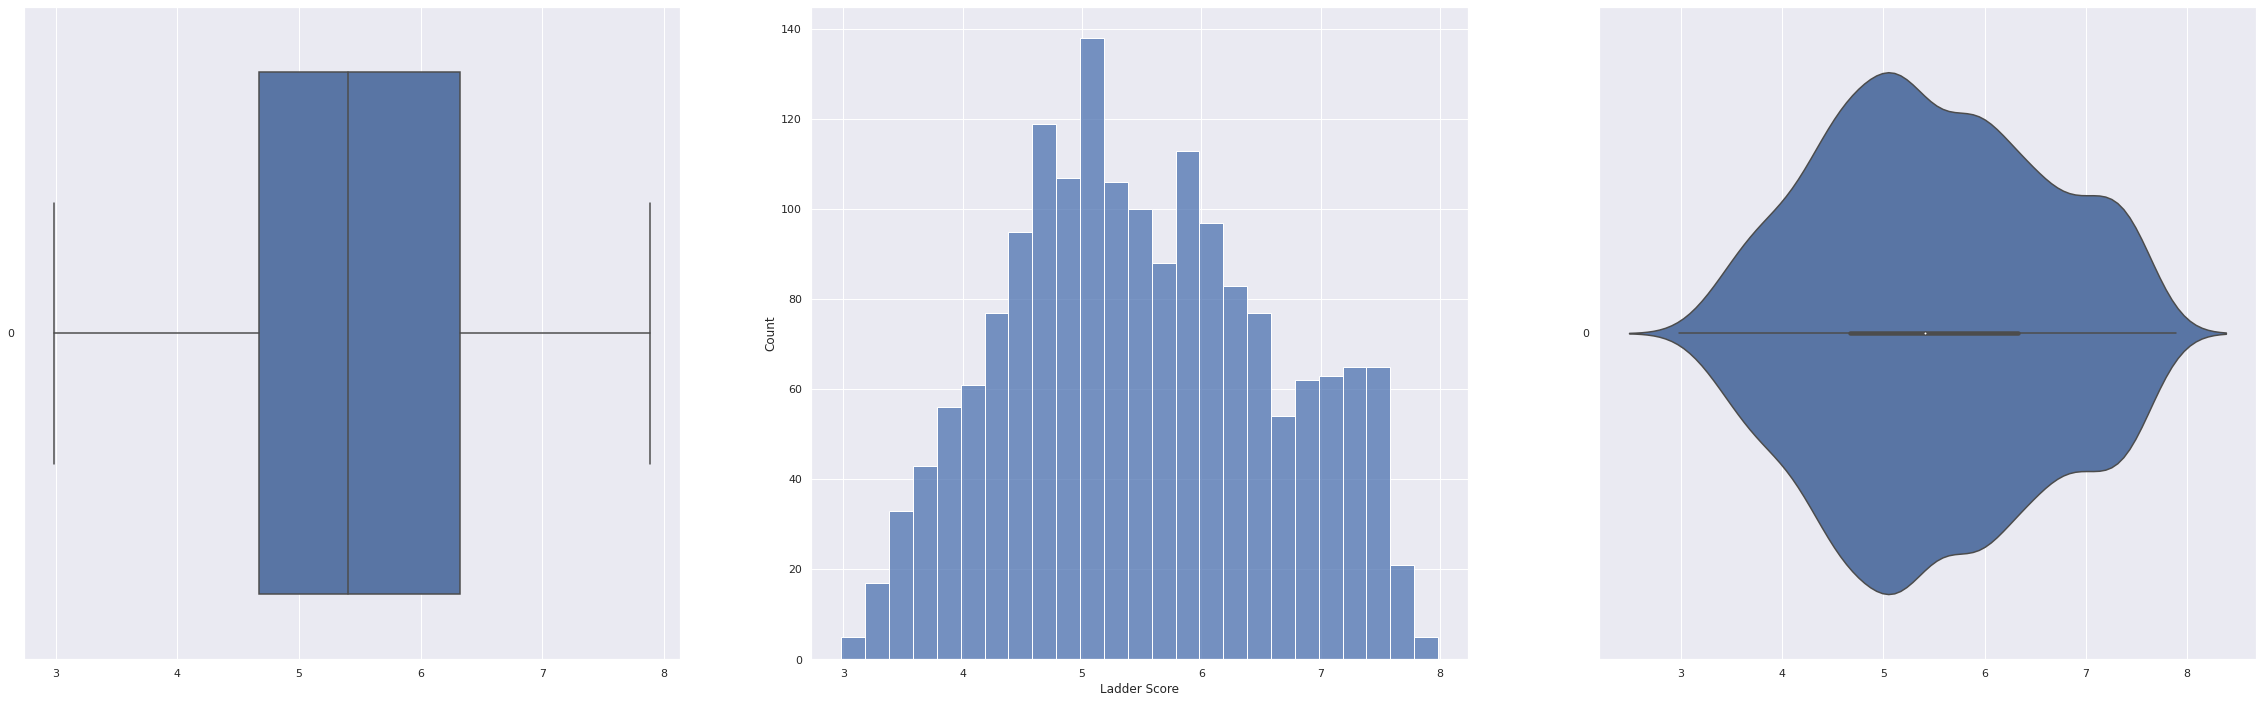

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(40, 12))
sb.boxplot(data = concat_df["Ladder Score"], orient = "h", ax = axes[0])
sb.histplot(data = concat_df['Ladder Score'], ax = axes[1], binwidth = 0.2)
sb.violinplot(data = concat_df["Ladder Score"], orient = "h", ax = axes[2])

Explore the predictor variable <mark>"InternetUsersPercentage"</mark>.

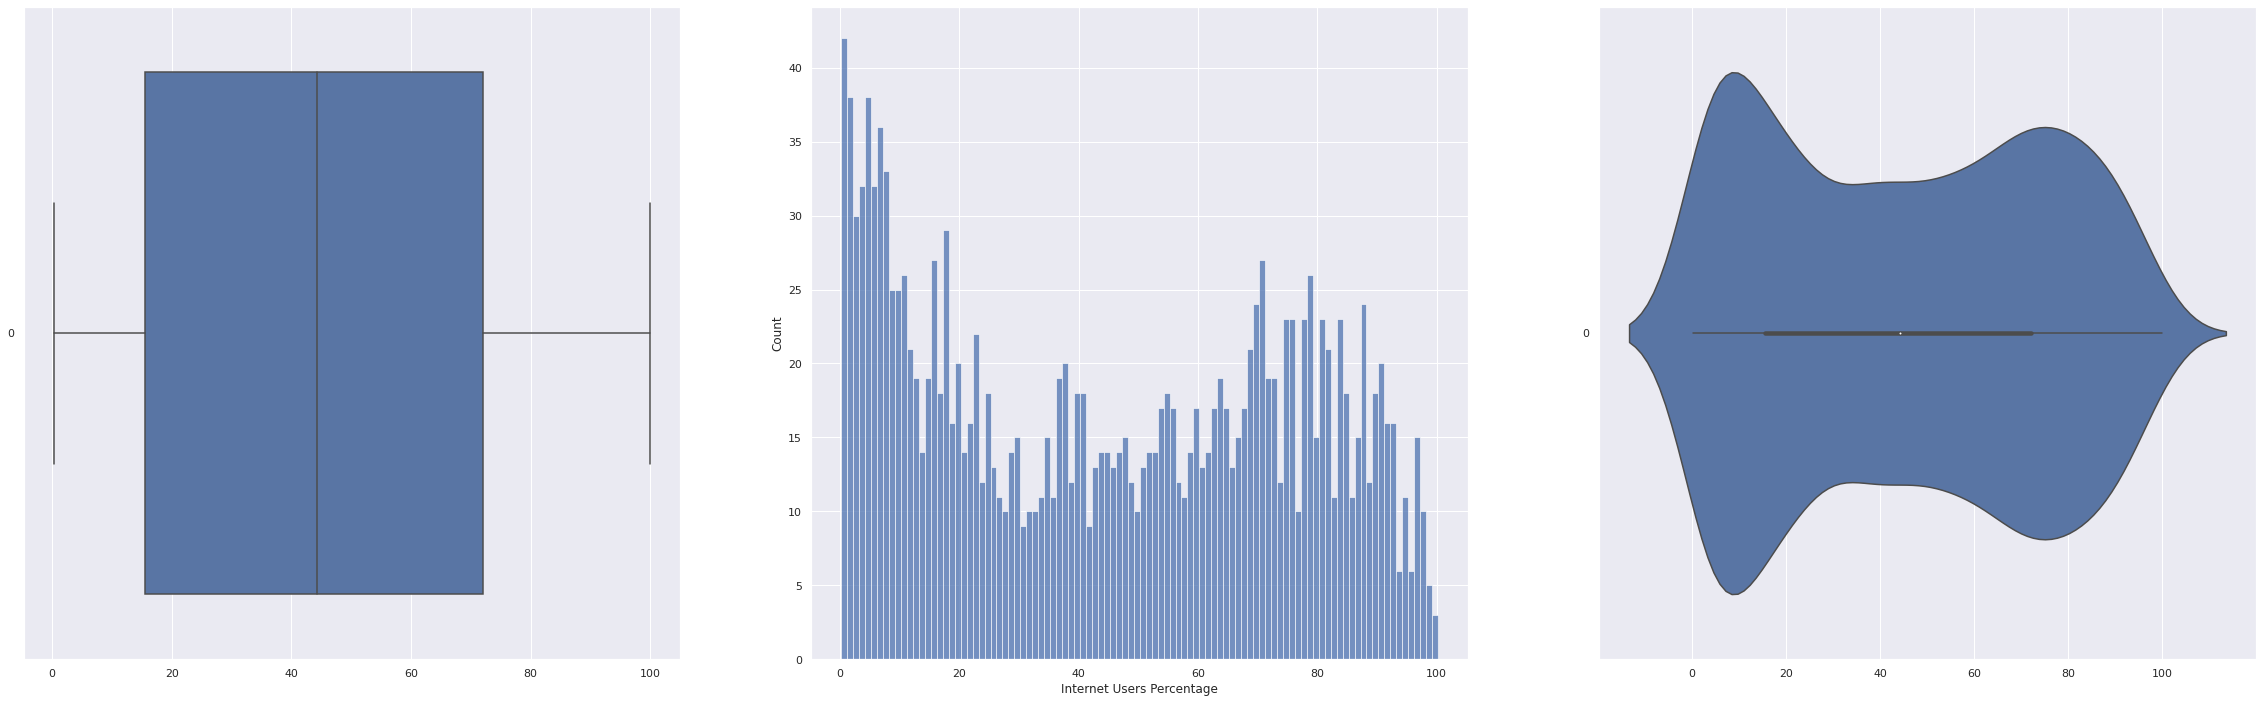

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(40, 12))
sb.boxplot(data = concat_df["Internet Users Percentage"], orient = "h", ax = axes[0])
sb.histplot(data = concat_df['Internet Users Percentage'], ax = axes[1], binwidth = 1)
sb.violinplot(data = concat_df["Internet Users Percentage"], orient = "h", ax = axes[2])

Joinplot of <mark>"HappinessIndex"</mark> against <mark>"InternetUsersPercentage"</mark>

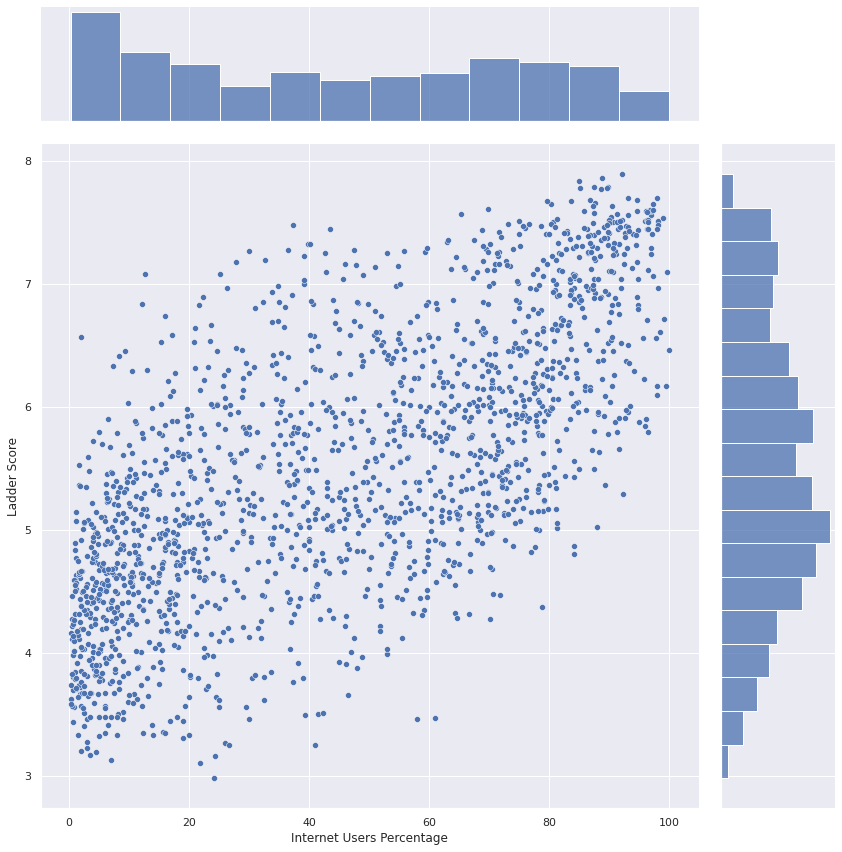

In [ ]:
sb.jointplot(data = concat_df, x = "Internet Users Percentage", y = "Ladder Score", height = 12)

Calculate the <mark>correlation</mark> between the two variables




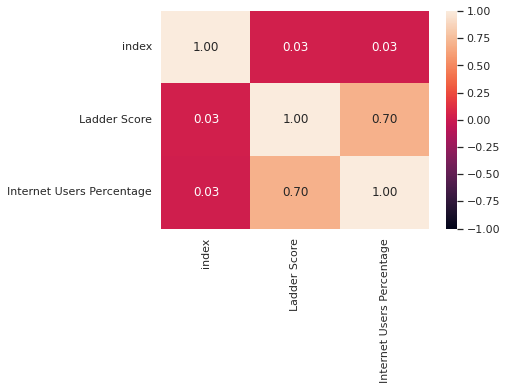

In [ ]:
# Calculate the correlation between the two columns/variables
sb.heatmap(concat_df.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<mark>Linear regression</mark> would be a suitable method for machine learning since there is a relatively <mark>high corrleation</mark> between the two variables

# Machine Learning Using Linear Regression

Response Variable : Ladder Score
Predictor Feature : Internet Users Percentage

> Regression Model : Ladder Score = $a$ $\times$ Internet Users Percentage + $b$  

Split the Train and Test Sets randomly and perform Linear Regression

Intercept of Regression 	: b =  [4.35420107]
Coefficients of Regression 	: a =  [[0.02553262]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4857330496675667
Mean Squared Error (MSE) 	: 0.6332834109955382

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5122730073122499
Mean Squared Error (MSE) 	: 0.561634800153697



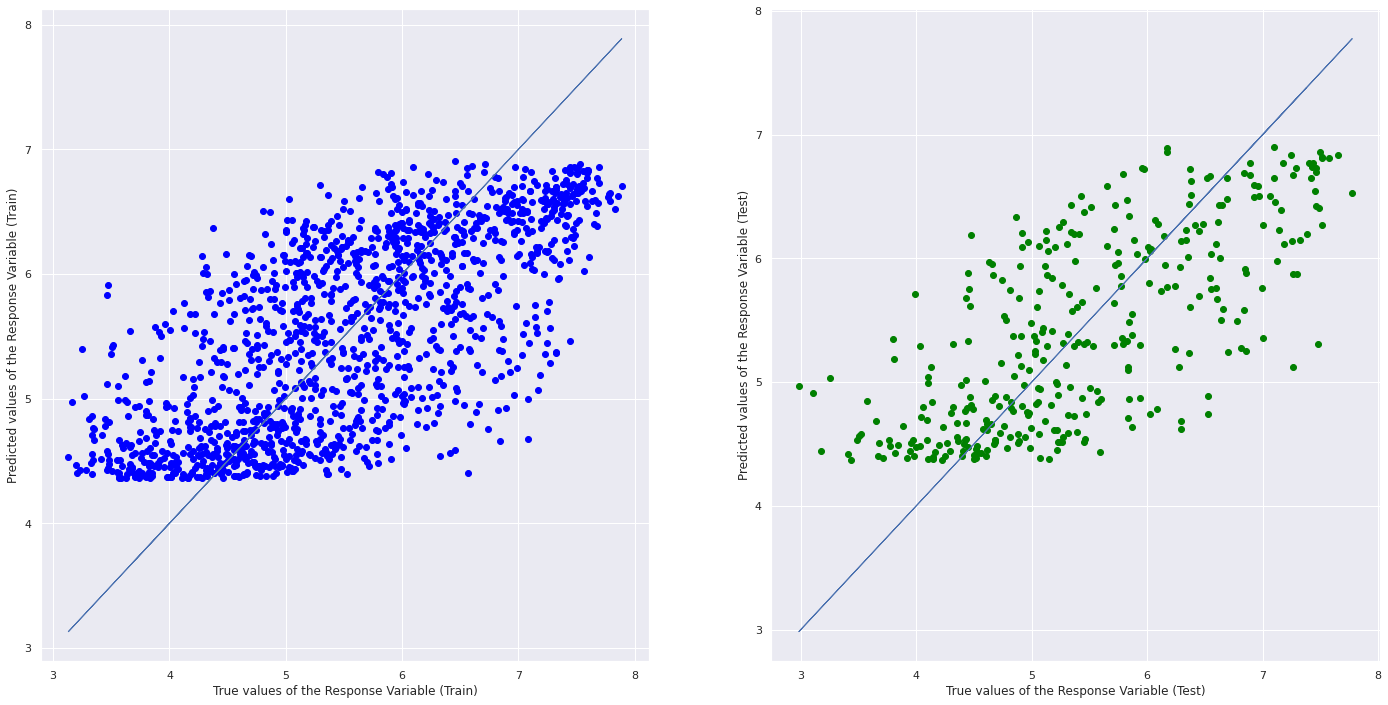

In [ ]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

HappinessIndex = pd.DataFrame(concat_df["Ladder Score"])   # Response
InternetUsersPercentage = pd.DataFrame(concat_df["Internet Users Percentage"])   # Predictor

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(InternetUsersPercentage, HappinessIndex, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'b-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'b-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()